In [73]:
# Import libraies
import pandas as pd
import gffpandas.gffpandas as gffpd
import matplotlib.pyplot as plt

In [74]:
# Load gff with coverage and modification summary data from modSummary.gff for M. xanthus
modsum = gffpd.read_gff3('mx_modSummary.gff')

# Inspect the data structure
print(modsum.header)
print(modsum.df)
print(modsum.df['attributes'].iat[-1])

##gff-version 3
##pacbio-summarize-coverage-version 1.0
##date Mon Jun 24 15:13:01 2024 UTC
##source PacBio_summarize-coverage 1.0
##source-commandline /mnt/beegfs/home/s434472/Thesis_AT/tools/pacbio_smrt_tools/smrtlink/install/smrtlink-release_13.1.0.221970/bundles/smrttools/install/smrttools-release_13.1.0.221970/private/pacbio/pbtk/binwrap/../../../../private/pacbio/pbtk/bin/summarize-coverage --force-num-regions=0 --log-file=summarize-coverage.log --num-threads=0 --log-level=INFO --max-region-size=100000 --num-regions=1000 --region-size=0 /mnt/beegfs/home/s434472/Thesis_AT/PB_analysis/Step_by_step/Myxococcus_xnt/Hifi_mapping/cromwell-executions/pb_align_ccs/f5ec1f5f-3cea-4d3a-b309-e01bbdc7b4ea/call-mapping/mapping/28ca2fb2-a5aa-4c55-a9a8-be0b3f0e35fa/call-coverage_reports/coverage_reports/d995984a-101e-4689-a7b2-4a1fd86310ec/call-summarize_coverage/inputs/481359092/gathered.consensusalignmentset.xml /mnt/beegfs/home/s434472/Thesis_AT/data/Myxococcus_xanthus/mx_ref.xml coverage.gff


In [79]:
# Split the attribute column by the tags in seperate columns and return a data frame
modsum_attr = modsum.attributes_to_columns()
# Inspect new data frame
print(modsum_attr)

# Get the genomic position coordinate from the last row (using 'start' coordinate instead of 'end' 
# because last row is not following even increments of 10000 bp and that creates problems for the plot) 
coordinate = modsum_attr['start'].iat[-1]

# Calculate genomic positions for x-axis 
genomic_positions = range(1, coordinate + 1, 10000)



         seq_id source    type    start      end  score strand phase  \
0    CP070500.1      .  region        1    10000    0.0      +     .   
1    CP070500.1      .  region    10001    20000    0.0      +     .   
2    CP070500.1      .  region    20001    30000    0.0      +     .   
3    CP070500.1      .  region    30001    40000    0.0      +     .   
4    CP070500.1      .  region    40001    50000    0.0      +     .   
..          ...    ...     ...      ...      ...    ...    ...   ...   
930  CP070500.1      .  region  9300001  9310000    0.0      +     .   
931  CP070500.1      .  region  9310001  9320000    0.0      +     .   
932  CP070500.1      .  region  9320001  9330000    0.0      +     .   
933  CP070500.1      .  region  9330001  9340000    0.0      +     .   
934  CP070500.1      .  region  9340001  9359382    0.0      +     .   

                                            attributes        cov  \
0    cov=1,33,69;cov2=33.807,19.597;gaps=0,0;modsfw...    1,33,69 

In [80]:
# Extract coverage data from 'cov2' column
coverage = modsum_attr['cov2'].str.split(',', expand=True)
coverage = coverage.apply(pd.to_numeric, errors='raise')
colnames = {0:'mean', 1:'sd'}
coverage = coverage.rename(columns=colnames)

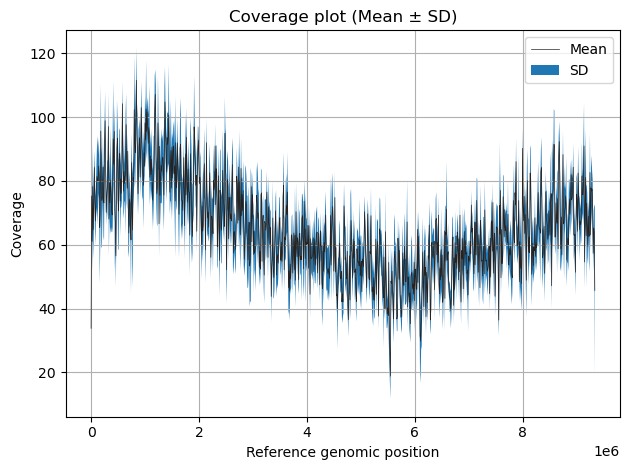

In [81]:
# Creating coverage plot
# Plot mean as a line
plt.plot(genomic_positions, coverage['mean'], linestyle='-', linewidth=0.5, color='#27221f', label='Mean')

# Shade the area between mean ± SD
plt.fill_between(genomic_positions, coverage['mean'] - coverage['sd'], coverage['mean'] + coverage['sd'], alpha=1, label="SD")

# Add labels and title
plt.xlabel('Reference genomic position')
plt.ylabel('Coverage')
plt.title('Coverage plot (Mean ± SD)')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# Extracting summarised modification data 
#  For fw starnd
m6a_fw = modsum_attr['modsfwd'].str.split(',', expand=True)
m6a_fw = m6a_fw.apply(pd.to_numeric, errors='raise')
colnames = {0:'modified_base', 1:'m6A', 2:'m4C', 3:'m5C'}
m6a_fw = m6a_fw.rename(columns=colnames)

# For rev strand
m6a_rev = modsum_attr['modsrev'].str.split(',', expand=True)
m6a_rev = m6a_rev.apply(pd.to_numeric, errors='raise')
colnames = {0:'modified_base', 1:'m6A', 2:'m4C', 3:'m5C'}
m6a_rev = m6a_rev.rename(columns=colnames)
# Inspect created df
print(m6a_rev)

     modified_base  m6A  m4C  m5C
0               93    4    7    0
1              252    9   28    0
2              218    9   40    0
3              292   10   20    0
4              181    4   31    0
..             ...  ...  ...  ...
930            186    5   36    0
931            162    7   24    0
932            196   10   20    0
933            123    5   30    0
934            328   14   29    0

[935 rows x 4 columns]


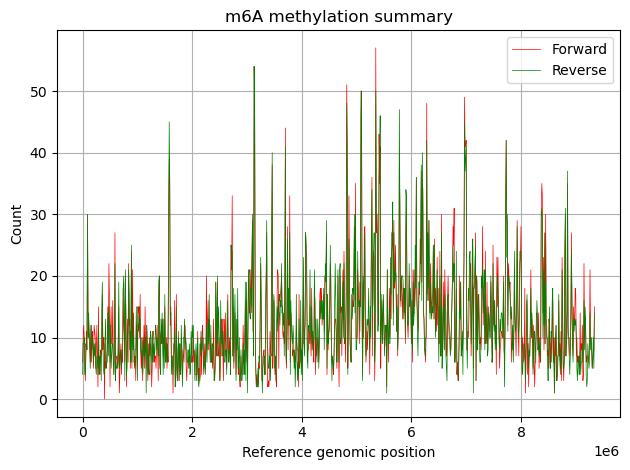

In [83]:
# Create m6A methylation summary plot

# Plot as a line number of detected m6A modifications per 10000 bp bin, for fw and rev  
plt.plot(genomic_positions, m6a_fw['m6A'], linestyle='-', linewidth=0.5, color='red', label='Forward')
plt.plot(genomic_positions, m6a_rev['m6A'], linestyle='-', linewidth=0.5, color='green', label='Reverse')

# Add labels and title
plt.xlabel('Reference genomic position')
plt.ylabel('Count')
plt.title('m6A methylation summary')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

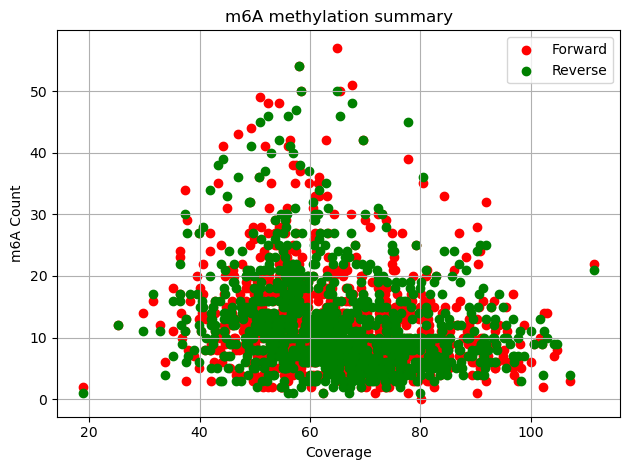

In [84]:
# Scatter plot of coverage vs m6A
plt.scatter(coverage['mean'], m6a_fw['m6A'], color='red', label='Forward')
plt.scatter(coverage['mean'], m6a_rev['m6A'], color='green', label='Reverse')

# Add labels and title
plt.xlabel('Coverage')
plt.ylabel('m6A Count')
plt.title('m6A methylation summary')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()